In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable

from numpy import genfromtxt

sys.path.insert(1, os.sep.join(["..", "packages"]))
from basicDistributionFunctions import characterist_r_i
from alphastable import alphastable, get_alpha_char
from multivare import multivate_characteristic_r_i_2_dim, tau_2_dim

In [2]:
Image_width = 10

if 0:
    plt.rc('text', usetex = True) # latex ticks
    plt.rc('text.latex')
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ['Computer Modern'],
    })

    EXTRA_SMALL = 10
    SMALL_SIZE = 12
    MEDIUM_SIZE = 15
    BIGGER_SIZE = 20

    plt.rc('font', size=EXTRA_SMALL)         # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Sample Puc 1

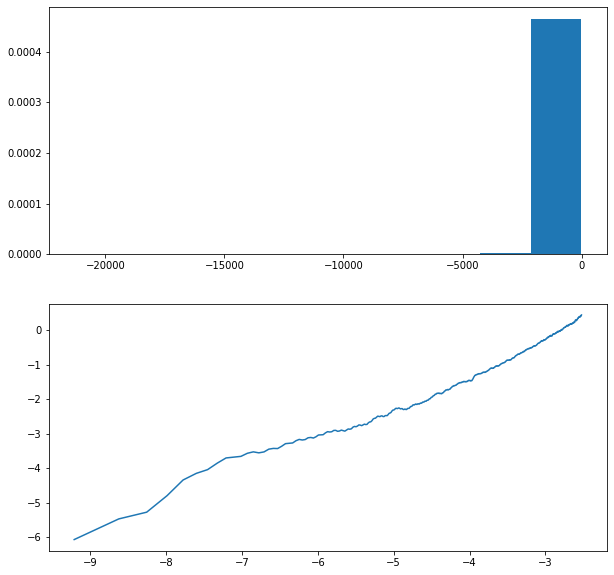

In [3]:
fig, ax = plt.subplots(nrows = 2, figsize = (Image_width, Image_width))
puc_1 = genfromtxt('Data/Puc_1.csv', delimiter=',')
# density
ax[0].hist(puc_1, density = 'True')
t = np.linspace(0.0001, 0.08, len(puc_1))
Re = characterist_r_i(t, puc_1)[0]
# characteristics Real part
ax[1].plot(np.log(t), np.log(-np.log(np.abs(Re))));

In [4]:
alpha, gamma = get_alpha_char(puc_1, t)
print(f"the estimated $\\alpha$ is {alpha} and $\\gamma$ is {gamma}")

the estimated $\alpha$ is 1.008435868457842 and $\gamma$ is 2.7588541778084563


In [5]:
# use scipy's quantile estimator to estimate the parameters and convert to S parameterization
pconv = lambda alpha, beta, mu, sigma: (alpha, beta, mu - sigma * beta * np.tan(np.pi * alpha / 2.0), sigma)
pconv(*levy_stable._fitstart(puc_1))

(0.8800792842267405, -1.0, 32.81504047404086, 6.25556837756667)

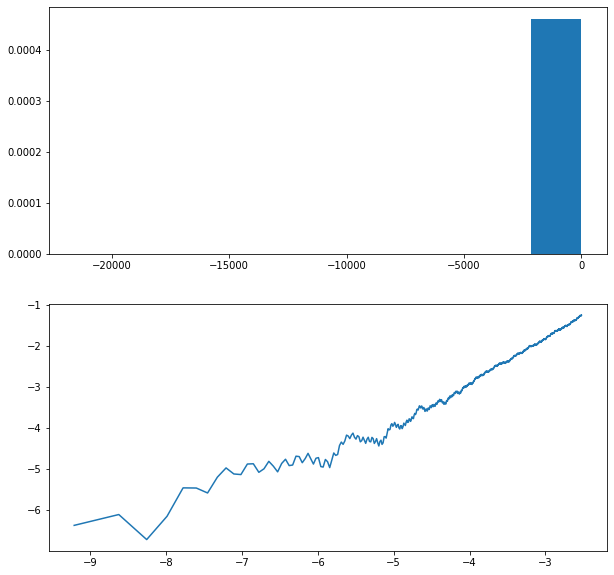

In [6]:
fig, ax = plt.subplots(nrows = 2, figsize = (Image_width, Image_width))
alphastable_vector = np.squeeze(alphastable(len(puc_1), 1, 1, -1, 3.3, 6.25556837756667, 0))
Re = characterist_r_i(t, alphastable_vector)[0]
ax[0].hist(alphastable_vector, density = True)
ax[1].plot(np.log(t), np.log(-np.log(np.abs(Re))))

## Sample Puc 2

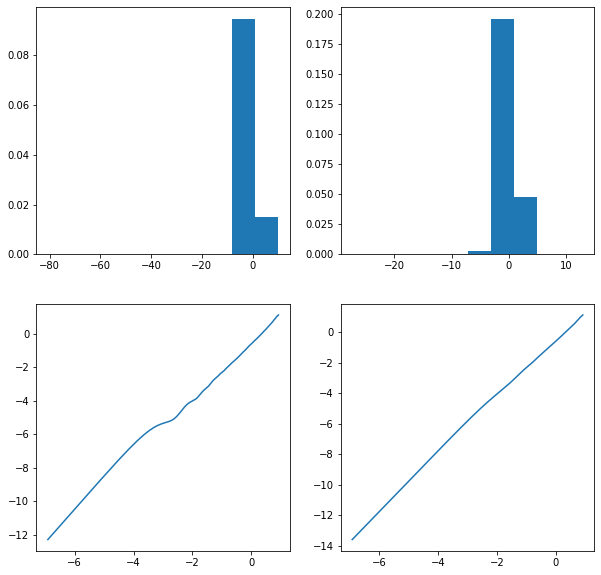

In [7]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (Image_width, Image_width))
puc_2 = genfromtxt('Data/Puc_2.csv', delimiter = ',')
ax[0, 0].hist(puc_2[0, :], density = 'True')
t = np.linspace(0.001, 2.5, len(puc_2[0, :]))
Re = characterist_r_i(t, puc_2[0, :])[0]
ax[1, 0].plot(np.log(t), np.log(-np.log(np.abs(Re))));

ax[0, 1].hist(puc_2[1, :], density = 'True')
Re = characterist_r_i(t, puc_2[1, :])[0]
ax[1, 1].plot(np.log(t), np.log(-np.log(np.abs(Re))));

In [8]:
alpha, gamma = get_alpha_char(puc_2[0,:], t)
print(f"the estimated $\\alpha$ is {alpha} and $\\gamma$ is {gamma}")

the estimated $\alpha$ is 1.6851800784812618 and $\gamma$ is -0.5520338477383931


In [9]:
# use scipy's quantile estimator to estimate the parameters and convert to S parameterization
pconv = lambda alpha, beta, mu, sigma: (alpha, beta, mu - sigma * beta * np.tan(np.pi * alpha / 2.0), sigma)
pconv(*levy_stable._fitstart(puc_2[0,:]))

(1.9032293122913466,
 -0.5491119410018753,
 -0.060986565021115755,
 0.7490769838505876)

In [10]:
alpha, gamma = get_alpha_char(puc_2[1,:], t)
print(f"the estimated $\\alpha$ is {alpha} and $\\gamma$ is {gamma}")

the estimated $\alpha$ is 1.7891771864597001 and $\gamma$ is -0.5553655809163913


In [11]:
# use scipy's quantile estimator to estimate the parameters and convert to S parameterization
pconv = lambda alpha, beta, mu, sigma: (alpha, beta, mu - sigma * beta * np.tan(np.pi * alpha / 2.0), sigma)
pconv(*levy_stable._fitstart(puc_2[1,:]))

(1.8079236007604216,
 0.06120964467553587,
 0.014105705910173731,
 0.7404841464985625)

### Measure estimation

In [12]:
MA = puc_2

n = 30
E = np.arange(0, 2*np.pi, np.pi / n)
R = np.arange(0, 5, 1)
Gamma = np.ones((len(E), len(R)))
Gamma[:] = np.nan

for k in range(len(E)):
    e = E[k]
    for j in range(len(R)):
        r = R[j]
        counter_1 = 0
        counter_2 = 0
        for i in range(len(MA)):
            if np.arctan2(MA[1, i], MA[0, i]) < e and np.linalg.norm(MA[:, i]) > r:
                counter_1 += 1
            if np.linalg.norm(MA[:, i]) > r:
                counter_2 += 1
        if counter_2 != 0:
            Gamma[k, j] = counter_1 / counter_2

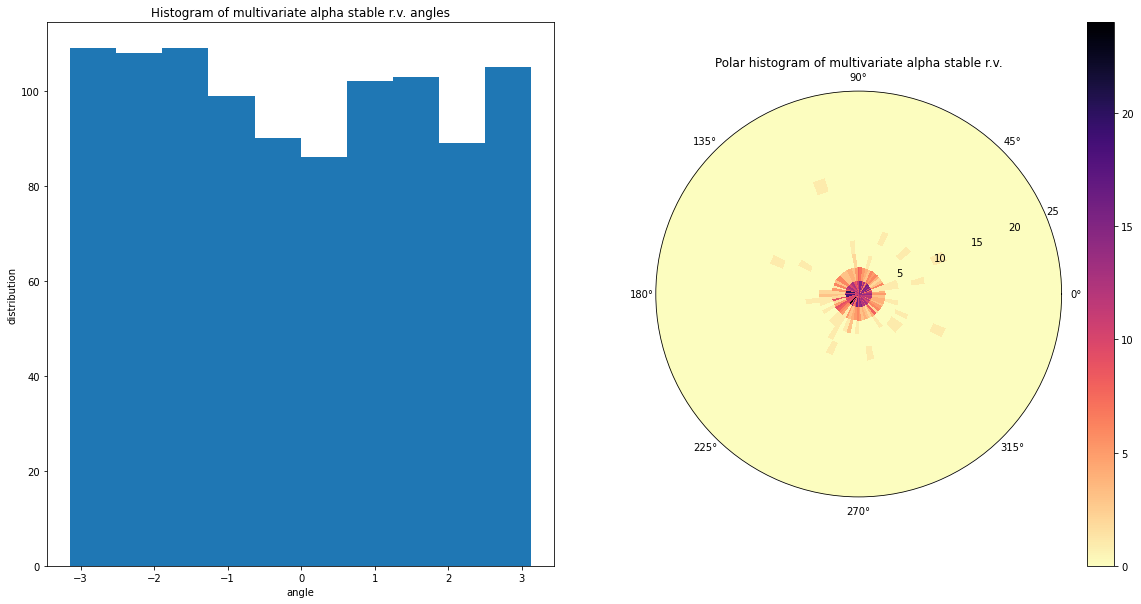

In [13]:
fig = plt.figure(figsize = (2 * Image_width, Image_width))
Points_angles = np.ones(np.size(MA, 1))
Points_radius = np.ones(np.size(MA, 1))
for i in range(np.size(MA, 1)):
    Points_angles[i] = np.arctan2(MA[1, i], MA[0, i]) # first one is  y coordinate and the second is x coordinate
    Points_radius[i] = np.linalg.norm(MA[:, i])
ax1 = fig.add_subplot(121)
ax1.hist(Points_angles)
ax1.set_title("Histogram of multivariate alpha stable r.v. angles")
ax1.set_xlabel("angle")
ax1.set_ylabel("distribution")

ax2 = fig.add_subplot(122, polar = True)
rbins = np.linspace(0, Points_radius.max(), 50)
abins = np.linspace(-np.pi, np.pi, 60)
hist, _, _ = np.histogram2d(Points_angles, Points_radius, bins = (abins, rbins))
Angles, Rad = np.meshgrid(abins, rbins)
ax2.grid(False)
pc = ax2.pcolormesh(Angles, Rad, hist.T, cmap = "magma_r")
ax2.set_ylim([0, 25])
ax2.set_title("Polar histogram of multivariate alpha stable r.v.")
fig.colorbar(pc);

$\Phi_{\alpha}(\varTheta) = \mathbf{E}e^{i (\varTheta \circ X)}$

In [25]:
T1 = np.arange(-5,5, 0.1)
T2 = np.arange(-5,5, 0.1)
mh = multivate_characteristic_r_i_2_dim(T1, T2, MA)


array([[-0.00901341, -0.02551428, -0.04135107, ..., -0.55703619,
        -0.5970931 , -0.63512341],
       [ 0.03747362,  0.02051066,  0.00419009, ..., -0.61514676,
        -0.65371837, -0.69017304],
       [ 0.08143396,  0.06380328,  0.04679625, ..., -0.6694102 ,
        -0.70629108, -0.74096994],
       ...,
       [-0.8172153 , -0.78689282, -0.75417231, ...,  0.06862663,
         0.08576565,  0.10364875],
       [-0.77332564, -0.74096994, -0.70629108, ...,  0.03054822,
         0.04679625,  0.06380328],
       [-0.7243857 , -0.69017304, -0.65371837, ..., -0.01135259,
         0.00419009,  0.02051066]])

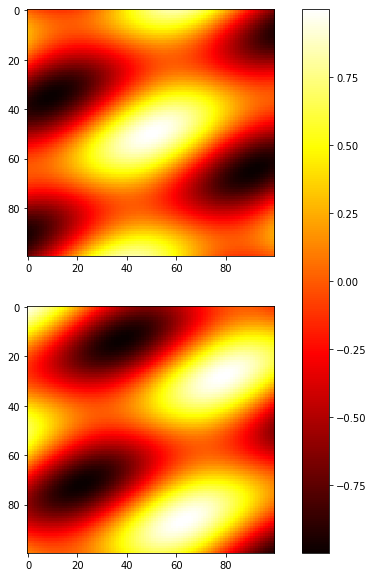

In [36]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (Image_width, Image_width))
# puc_2 = genfromtxt('Data/Puc_2.csv', delimiter = ',')
ax[0].imshow(mh[0], cmap='hot', interpolation='nearest');
c = ax[1].imshow(mh[1], cmap='hot', interpolation='nearest');
fig.colorbar(c, ax=ax)

In [37]:
tau_2_dim(MA)

[0.38132681961818704, 2.7755575615628914e-17]

## Sample Puc 3

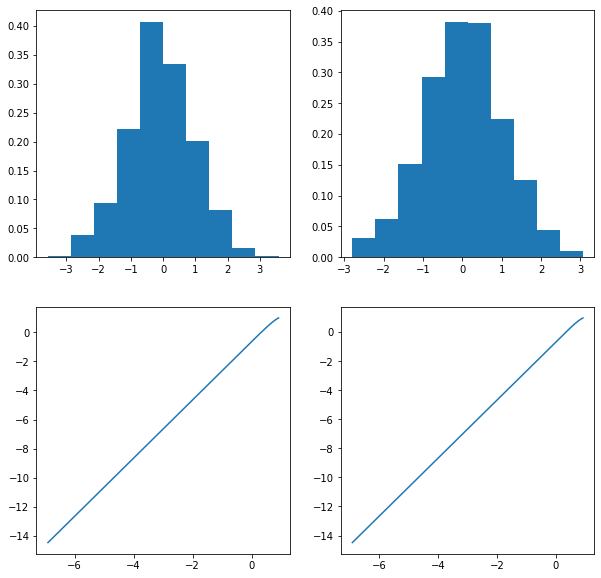

In [39]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (Image_width, Image_width))
puc_3 = genfromtxt('Data/Puc_3.csv', delimiter = ',')
ax[0, 0].hist(puc_3[0, :], density = 'True')
t = np.linspace(0.001, 2.5, len(puc_3[0, :]))
Re = characterist_r_i(t, puc_3[0, :])[0]
ax[1, 0].plot(np.log(t), np.log(-np.log(np.abs(Re))));

ax[0, 1].hist(puc_3[1, :], density = 'True')
Re = characterist_r_i(t, puc_3[1, :])[0]
ax[1, 1].plot(np.log(t), np.log(-np.log(np.abs(Re))));

In [41]:
alpha, gamma = get_alpha_char(puc_2[0,:], t)
print(f"the estimated $\\alpha$ is {alpha} and $\\gamma$ is {gamma}")

the estimated $\alpha$ is 1.6851800784812618 and $\gamma$ is -0.5520338477383931


In [44]:
MA = puc_3

n = 30
E = np.arange(0, 2*np.pi, np.pi / n)
R = np.arange(0, 5, 1)
Gamma = np.ones((len(E), len(R)))
Gamma[:] = np.nan

for k in range(len(E)):
    e = E[k]
    for j in range(len(R)):
        r = R[j]
        counter_1 = 0
        counter_2 = 0
        for i in range(len(MA)):
            if np.arctan2(MA[1, i], MA[0, i]) < e and np.linalg.norm(MA[:, i]) > r:
                counter_1 += 1
            if np.linalg.norm(MA[:, i]) > r:
                counter_2 += 1
        if counter_2 != 0:
            Gamma[k, j] = counter_1 / counter_2

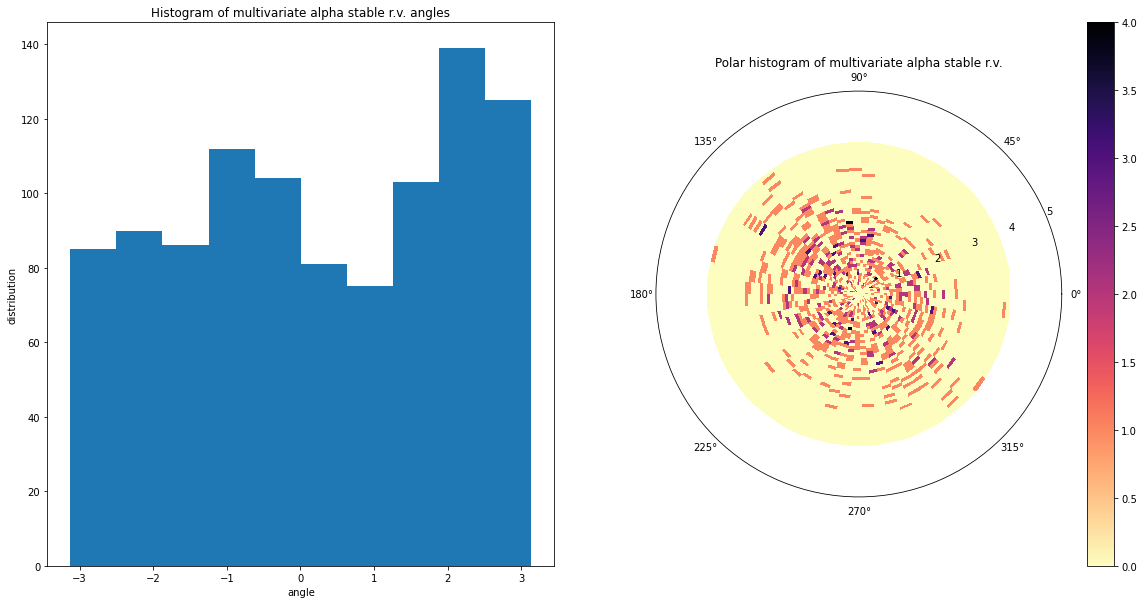

In [46]:
fig = plt.figure(figsize = (2 * Image_width, Image_width))
Points_angles = np.ones(np.size(MA, 1))
Points_radius = np.ones(np.size(MA, 1))
for i in range(np.size(MA, 1)):
    Points_angles[i] = np.arctan2(MA[1, i], MA[0, i]) # first one is  y coordinate and the second is x coordinate
    Points_radius[i] = np.linalg.norm(MA[:, i])
ax1 = fig.add_subplot(121)
ax1.hist(Points_angles)
ax1.set_title("Histogram of multivariate alpha stable r.v. angles")
ax1.set_xlabel("angle")
ax1.set_ylabel("distribution")

ax2 = fig.add_subplot(122, polar = True)
rbins = np.linspace(0, Points_radius.max(), 50)
abins = np.linspace(-np.pi, np.pi, 60)
hist, _, _ = np.histogram2d(Points_angles, Points_radius, bins = (abins, rbins))
Angles, Rad = np.meshgrid(abins, rbins)
ax2.grid(False)
pc = ax2.pcolormesh(Angles, Rad, hist.T, cmap = "magma_r")
ax2.set_ylim([0, 5])
ax2.set_title("Polar histogram of multivariate alpha stable r.v.")
fig.colorbar(pc);

$\Phi_{\alpha}(\varTheta) = \mathbf{E}e^{i (\varTheta \circ X)}$

In [48]:
T1 = np.arange(-5,5, 0.1)
T2 = np.arange(-5,5, 0.1)
mh = multivate_characteristic_r_i_2_dim(T1, T2, MA)



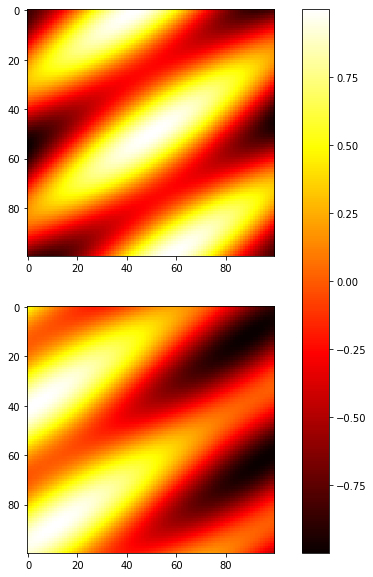

In [49]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (Image_width, Image_width))

ax[0].imshow(mh[0], cmap='hot', interpolation='nearest');
c = ax[1].imshow(mh[1], cmap='hot', interpolation='nearest');
fig.colorbar(c, ax=ax)

In [50]:
tau_2_dim(MA)

[0.3223804045549188, 0.0]